In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import h5py

In [2]:
import json

In [3]:
import sys

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
sys.path.append('../')

In [6]:
import importlib

In [7]:
from glob import glob

In [42]:
perf_files = glob('../models/My*/perf.json')

In [43]:
len(perf_files)

43

In [44]:
tot_dict = {}

for ipf,pf in enumerate(perf_files):
    with open(pf, 'r') as PF:
        tdic = json.load(PF)
        
        if ipf == 0:
            for kk in tdic.keys():
                tot_dict[kk] = []
        
        for kk in tdic.keys():
            if kk not in tot_dict.keys(): continue
            tot_dict[kk].append(tdic[kk])
            
for kk in tot_dict:
    tot_dict[kk] = np.array(tot_dict[kk])

In [45]:
print(tot_dict.keys())

dict_keys(['name', 'npars', 'qkeras', 'clayers', 'dlayers', 'CBNorm', 'DBNorm', 'LL', 'ptype', 'penX', 'penA', 'bkgPen', 'regBias', 'res', 'pool', 'mod_mae_x', 'mod_mae_a', 'mod_mse_x', 'mod_mse_a', 'mod_auc', 'mod_dx_median', 'mod_da_median', 'mod_dx_mean', 'mod_da_mean', 'mod_dx_std', 'mod_da_std', 'mod_dx_iqr', 'mod_da_iqr', 'skew_dx', 'skew_da', 'dx_mmm', 'da_mmm', 'dx_mode', 'da_mode'])


## Make plots

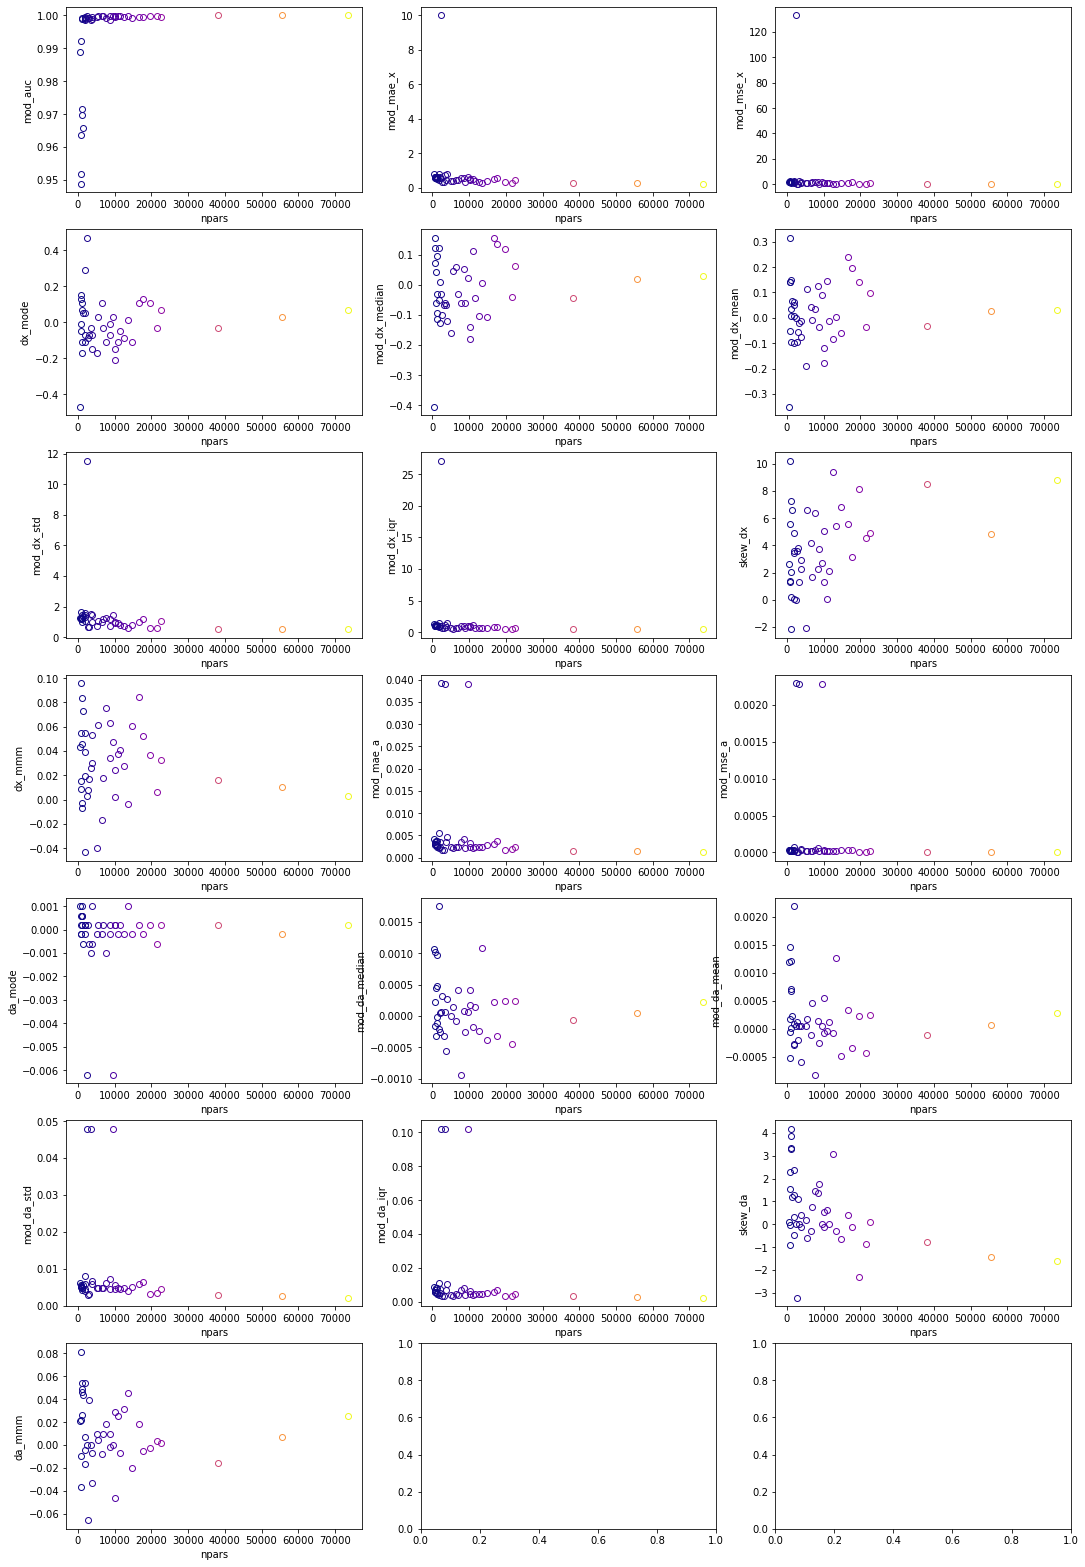

In [46]:
ncols, nrows = (3,7)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6*ncols,4*nrows))
axs = axs.flatten()

this_sel = (tot_dict['npars']<10000000)
this_sel *= (tot_dict['mod_auc']>0.9)
min_npars = tot_dict['npars'][this_sel].min()
max_npars = tot_dict['npars'][this_sel].max()

mcmap = plt.cm.plasma

vars = ['mod_auc',
        'mod_mae_x', 'mod_mse_x', 'dx_mode', 'mod_dx_median', 'mod_dx_mean', 'mod_dx_std', 'mod_dx_iqr', 'skew_dx', 'dx_mmm',
        'mod_mae_a', 'mod_mse_a', 'da_mode', 'mod_da_median', 'mod_da_mean', 'mod_da_std', 'mod_da_iqr', 'skew_da', 'da_mmm'
        ]

for im in np.array(range(len(tot_dict['mod_mse_x'])))[this_sel]:
    
#     colx = np.log(tot_dict['npars'][im] - min_npars + 1e-6)/np.log(max_npars - min_npars)
    colx = (tot_dict['npars'][im] - min_npars + 1e-6)/(max_npars - min_npars)
    # if tot_dict['ptype'][im] != 0: continue
    # if tot_dict['penX'][im] is False: continue
    
    mkr = 'o'
    if tot_dict['res'][im]>0: mkr='P'
    for iv,vr in enumerate(vars):
        axs[iv].plot(  tot_dict['npars'][im], tot_dict[vr][im], mkr,      color=mcmap(colx), fillstyle='none')

for iv,vr in enumerate(vars):
    axs[iv].set_xlabel('npars')
    axs[iv].set_ylabel(vr)

plt.show()

["16673",  "../models/MyTCN_5,3,1:10,3,1_100_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["14758",  "../models/MyTCN_5,4,1:10,4,1_100_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["6943",  "../models/MyTCN_5,3,1:5,3,1_50:50_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["19658",  "../models/MyTCN_5,4,1:10,4,1_100:50_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["38143",  "../models/MyTCN_10,3,1:20,3,1_100:50_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["11023",  "../models/MyTCN_5,3,1:10,3,1_50:50_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["803",  "../models/MyTCN_10,4,1_none_CBNormTrue_DBNormFalse_ll1_ptype0_penXTrue_penATrue_bkgPenFalse_regBiasTrue_Flatten"],
["1803",  "../models/MyTCN_10,3,1:20,3,1_none_CBNormTrue_DBNormFalse_ll1_p

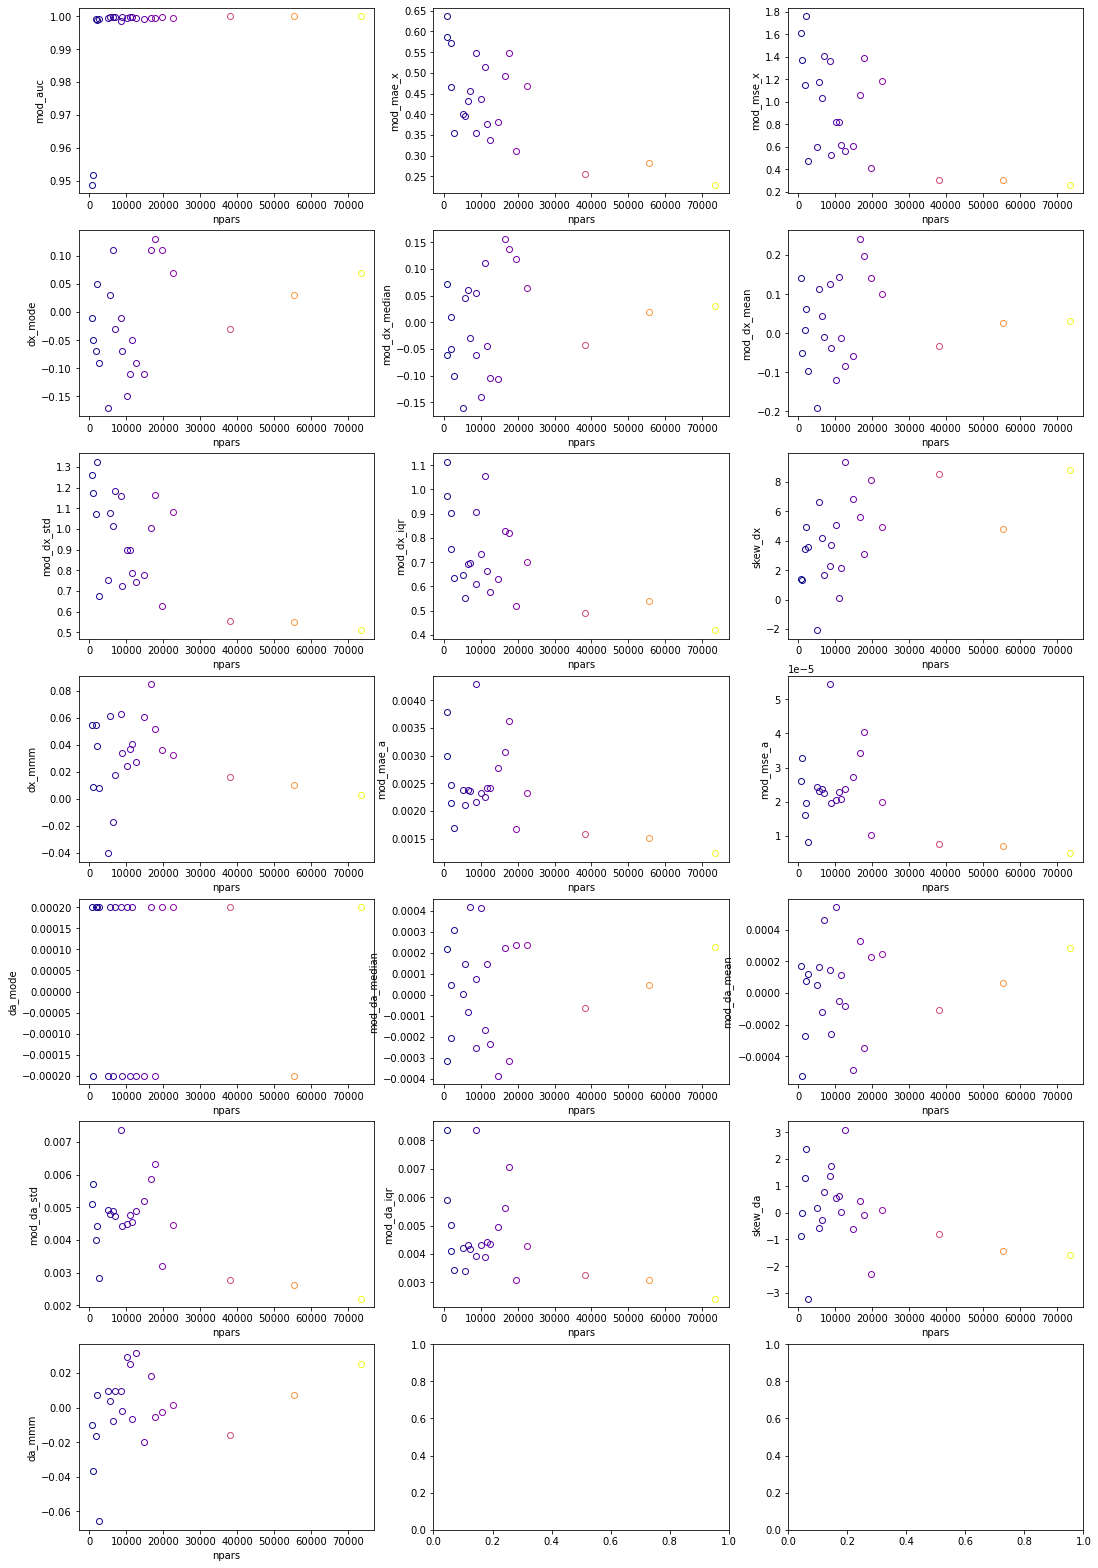

In [47]:
ncols, nrows = (3,7)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(6*ncols,4*nrows))
axs = axs.flatten()

this_sel = (tot_dict['npars']<10000000)

# this_sel *= (np.abs(tot_dict['da_mmm'])<0.02)
# this_sel *= (np.abs(tot_dict['dx_mmm'])<0.02)

this_sel *= (np.abs(tot_dict['mod_mse_x'])<2.0)
# this_sel *= (np.abs(tot_dict['mod_mse_a'])<0.001)

# this_sel *= (np.abs(tot_dict['mod_dx_iqr'])<1)
# this_sel *= (np.abs(tot_dict['mod_da_iqr'])<0.02)

# this_sel *= (np.abs(tot_dict['mod_dx_median'])<0.02)
# this_sel *= (np.abs(tot_dict['mod_da_median'])<0.0004)

this_sel *= (np.abs(tot_dict['dx_mode'])<0.2)
this_sel *= (np.abs(tot_dict['da_mode'])<0.0005)


min_npars = tot_dict['npars'][this_sel].min()
max_npars = tot_dict['npars'][this_sel].max()

mcmap = plt.cm.plasma

vars = ['mod_auc',
        'mod_mae_x', 'mod_mse_x', 'dx_mode', 'mod_dx_median', 'mod_dx_mean', 'mod_dx_std', 'mod_dx_iqr', 'skew_dx', 'dx_mmm',
        'mod_mae_a', 'mod_mse_a', 'da_mode', 'mod_da_median', 'mod_da_mean', 'mod_da_std', 'mod_da_iqr', 'skew_da', 'da_mmm'
        ]

for im in np.array(range(len(tot_dict['mod_mse_x'])))[this_sel]:
    
#     colx = np.log(tot_dict['npars'][im] - min_npars + 1e-6)/np.log(max_npars - min_npars)
    colx = (tot_dict['npars'][im] - min_npars + 1e-6)/(max_npars - min_npars)
    
    mkr = 'o'
    if tot_dict['res'][im]>0: mkr='P'
    for iv,vr in enumerate(vars):
        axs[iv].plot(  tot_dict['npars'][im], tot_dict[vr][im], mkr,      color=mcmap(colx), fillstyle='none')
    
    print('["'+str(tot_dict['npars'][im])+ '",', ' "../'+tot_dict['name'][im]+'"],')

for iv,vr in enumerate(vars):
    axs[iv].set_xlabel('npars')
    axs[iv].set_ylabel(vr)

plt.show()

In [32]:
all_clayers = []
tot_dict['cl_ind'] = []
tot_dict['dl_ind'] = []

for cl in tot_dict['clayers']:
    if cl not in all_clayers:
        all_clayers.append(cl)
    tot_dict['cl_ind'].append( all_clayers.index(cl) )
    
all_dlayers = []

for dl in tot_dict['dlayers']:
    if dl not in all_dlayers:
        all_dlayers.append(dl)
    tot_dict['dl_ind'].append( all_dlayers.index(dl) )

tot_dict['cl_ind'] = np.array(tot_dict['cl_ind'])
tot_dict['dl_ind'] = np.array(tot_dict['dl_ind'])

In [33]:
y_max = len(all_clayers)

In [34]:
tot_dict['mod_mae_a_100'] = tot_dict['mod_mae_a']*100
tot_dict['dl_ind_41'] = tot_dict['dl_ind']*(y_max-1)/3
tot_dict['ptype_61'] = tot_dict['ptype']*(y_max-1)/2
tot_dict['bkgPen_121'] = tot_dict['bkgPen']*(y_max-1)
tot_dict['res_12'] = tot_dict['res']*(y_max-1)
tot_dict['regBias_121'] = tot_dict['regBias']*(y_max-1)
tot_dict['pool_61'] = tot_dict['pool']*(y_max-1)/2

In [35]:
vars = ['cl_ind', 'dl_ind_41', 'res_12', 'ptype_61', 'bkgPen_121', 'regBias_121', 'pool_61', 'mod_mse_x', 'mod_mae_a_100']
var_names = ['CLs', 'DLs', 'residual', 'ptype', 'bkgPen', 'regBias', 'pool', 'mseX        mae_a*100', 'mae_a']

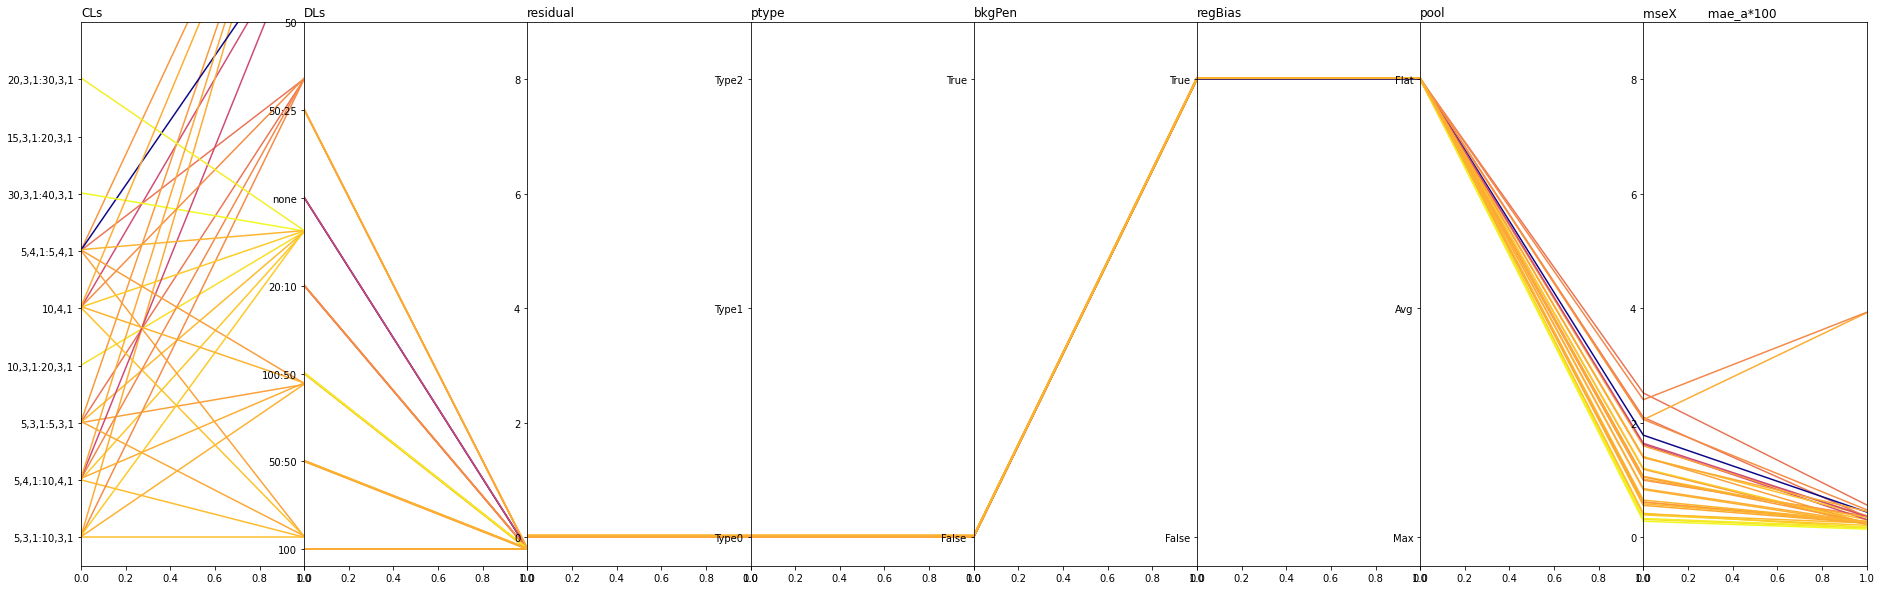

In [36]:
ncols, nrows = (len(vars)-1,1)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols,10*nrows), sharey=False)
axs = axs.flatten()
    
this_mod = 0
max_msex = 100
max_max_msex = np.log( np.array(tot_dict['mod_mse_x'])[np.array(tot_dict['mod_mse_x'])<max_msex].max() )
min_max_msex = np.log( np.array(tot_dict['mod_mse_x'])[np.array(tot_dict['mod_mse_x'])<max_msex].min() )

this_sel = (tot_dict['npars']<10000000)

min_npars = tot_dict['npars'][this_sel].min()
max_npars = tot_dict['npars'][this_sel].max()

for imod in np.array(range(len(tot_dict['mod_mse_x'])))[this_sel]:
    
    if tot_dict['mod_mse_x'][imod] > max_msex: continue
    if tot_dict['npars'][imod] > 1000000: continue
    
    # col_x = (np.log( tot_dict['mod_mse_x'][imod] ) - min_max_msex)/(max_max_msex - min_max_msex)
    col_x = np.log(tot_dict['npars'][imod] - min_npars + 1e-6)/np.log(max_npars - min_npars)
    # col_x = tot_dict['mod_mse_x'][imod]/max(tot_dict['mod_mse_x'])
    
    for iar in range(len(vars) - 1):
        ivar = vars[iar]
        ivari = vars[iar+1]
        
        # if 'regBias' in ivar:
        #     ysets = [tot_dict[ivar][imod] + this_mod*0.001, tot_dict[ivari][imod]]
        # elif 'mse' in ivar or 'auc' in ivar or 'mae' in ivar:
        #     ysets = [tot_dict[ivar][imod], tot_dict[ivari][imod]]
        # else:
        ysets = [tot_dict[ivar][imod] + this_mod*0.001, tot_dict[ivari][imod] + this_mod*0.001]
        
        axs[iar].plot( [0, 1], ysets, color=plt.cm.plasma(col_x) )
        axs[iar].set_title(var_names[iar], loc='left')
    
    this_mod += 1
        

for iax,ax in enumerate(axs):
    ax.set_ylim(-0.5, y_max)
    ax.set_xlim(0,1)
    if iax == 0:
        ax.set_yticks( range(len(all_clayers)) )
        ax.set_yticklabels( all_clayers )
    if iax == 1:
        ax.set_yticks( np.array(range(len(all_dlayers)))*(y_max-1)/3 )
        ax.set_yticklabels( all_dlayers )
    if iax == 3:
        ax.set_yticks( np.array([0,1,2])*(y_max-1)/2 )
        ax.set_yticklabels( ['Type0', 'Type1', 'Type2'] )
    if iax == 4 or iax == 5:
        ax.set_yticks( np.array([0,1])*(y_max-1) )
        ax.set_yticklabels( ['False', 'True'] )
    if iax == 6:
        ax.set_yticks( np.array([0,1,2])*(y_max-1)/2 )
        ax.set_yticklabels( ['Max', 'Avg', 'Flat'] )
    
plt.subplots_adjust(wspace=0)
plt.show()

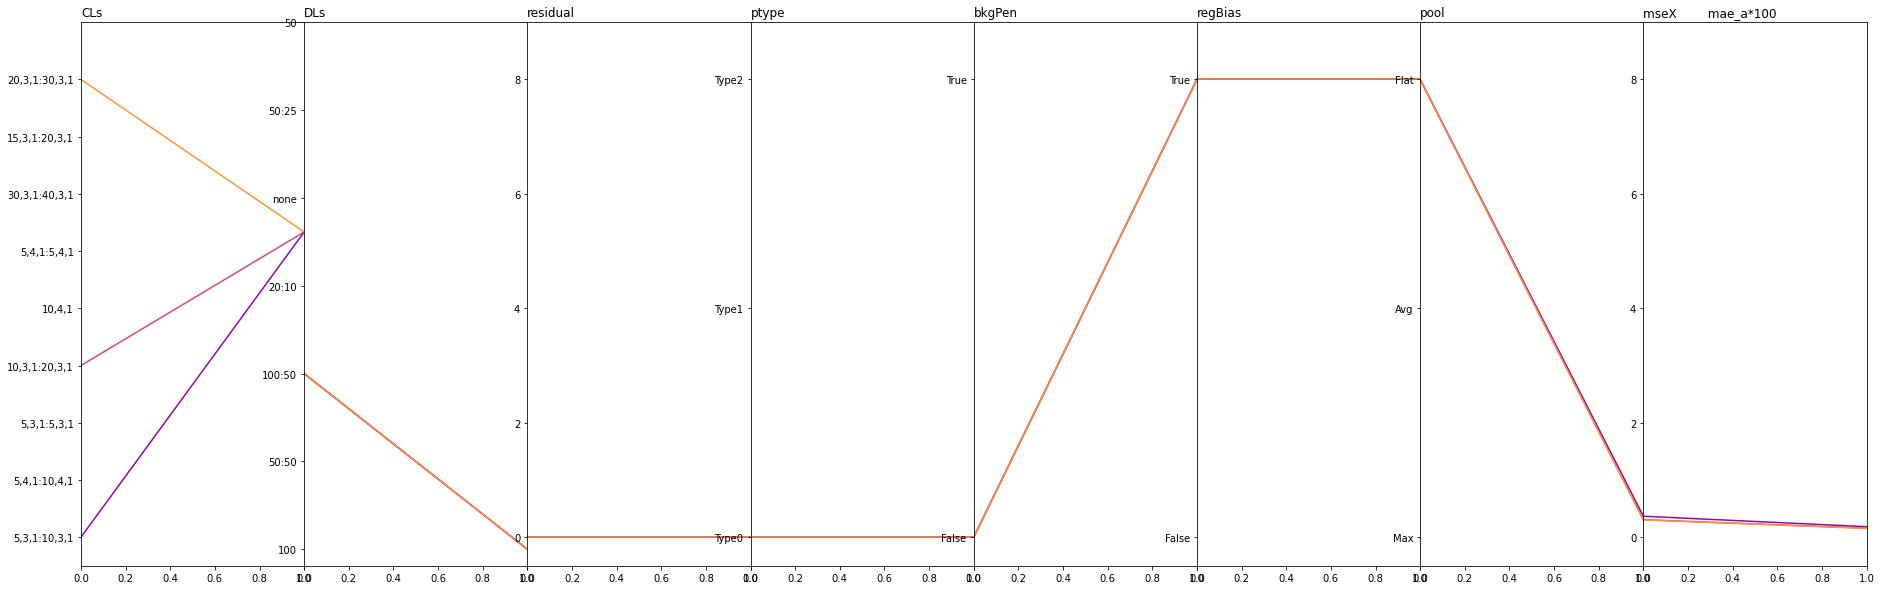

In [37]:
ncols, nrows = (len(vars)-1,1)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols,10*nrows), sharey=False)
axs = axs.flatten()
    
this_mod = 0
max_msex = 100
max_max_msex = np.log( np.array(tot_dict['mod_mse_x'])[np.array(tot_dict['mod_mse_x'])<max_msex].max() )
min_max_msex = np.log( np.array(tot_dict['mod_mse_x'])[np.array(tot_dict['mod_mse_x'])<max_msex].min() )

min_npars = tot_dict['npars'][this_sel].min()
max_npars = tot_dict['npars'][this_sel].max()

this_sel = (tot_dict['npars']<10000000)

this_sel *= (np.abs(tot_dict['da_mmm'])<0.025)
this_sel *= (np.abs(tot_dict['dx_mmm'])<0.025)

this_sel *= (np.abs(tot_dict['mod_mse_x'])<1.4)
this_sel *= (np.abs(tot_dict['mod_mse_a'])<1.4)

this_sel *= (np.abs(tot_dict['mod_dx_iqr'])<0.8)
this_sel *= (np.abs(tot_dict['mod_da_iqr'])<0.02)

this_sel *= (np.abs(tot_dict['mod_dx_median'])<0.05)
this_sel *= (np.abs(tot_dict['mod_da_median'])<0.0005)

for imod in np.array(range(len(tot_dict['mod_mse_x'])))[this_sel]:
    
    if tot_dict['mod_mse_x'][imod] > max_msex: continue
    if tot_dict['npars'][imod] > 1000000: continue
    
    # col_x = (np.log( tot_dict['mod_mse_x'][imod] ) - min_max_msex)/(max_max_msex - min_max_msex)
    col_x = (tot_dict['npars'][imod] - min_npars + 1e-6)/(max_npars - min_npars)
    # col_x = tot_dict['mod_mse_x'][imod]/max(tot_dict['mod_mse_x'])
    
    for iar in range(len(vars) - 1):
        ivar = vars[iar]
        ivari = vars[iar+1]
        
        # if 'regBias' in ivar:
        #     ysets = [tot_dict[ivar][imod] + this_mod*0.001, tot_dict[ivari][imod]]
        # elif 'mse' in ivar or 'auc' in ivar or 'mae' in ivar:
        #     ysets = [tot_dict[ivar][imod], tot_dict[ivari][imod]]
        # else:
        ysets = [tot_dict[ivar][imod] + this_mod*0.0001, tot_dict[ivari][imod] + this_mod*0.0001]
        
        axs[iar].plot( [0, 1], ysets, color=plt.cm.plasma(col_x) )
        axs[iar].set_title(var_names[iar], loc='left')
    
    this_mod += 1
        

for iax,ax in enumerate(axs):
    ax.set_ylim(-0.5, y_max)
    ax.set_xlim(0,1)
    if iax == 0:
        ax.set_yticks( range(len(all_clayers)) )
        ax.set_yticklabels( all_clayers )
    if iax == 1:
        ax.set_yticks( np.array(range(len(all_dlayers)))*(y_max-1)/3 )
        ax.set_yticklabels( all_dlayers )
    if iax == 3:
        ax.set_yticks( np.array([0,1,2])*(y_max-1)/2 )
        ax.set_yticklabels( ['Type0', 'Type1', 'Type2'] )
    if iax == 4 or iax == 5:
        ax.set_yticks( np.array([0,1])*(y_max-1) )
        ax.set_yticklabels( ['False', 'True'] )
    if iax == 6:
        ax.set_yticks( np.array([0,1,2])*(y_max-1)/2 )
        ax.set_yticklabels( ['Max', 'Avg', 'Flat'] )
    
plt.subplots_adjust(wspace=0)
plt.show()